In [509]:
# Importando o pandas para explorar os dados
import pandas as pd

# Trabalhando com datas 
import datetime as dt

# Usada para criar visões
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

# Criacao de PDF
from fpdf import FPDF

# retirando os warnings do codigo
import warnings
warnings.filterwarnings('ignore')


In [510]:
df = pd.read_csv(r'bases/tratadas/exportacao_15_anos_tratada.csv', sep=';')
df.head(10)

,pais_origem,pais_destino,quantidade_litro,valor,categorias,ano_exportado
0,Brasil,"Alemanha, República Democrática",265742.0,429970.0,Vinhos de mesa,2008
1,Brasil,Angola,25721.0,71083.0,Vinhos de mesa,2008
2,Brasil,Antilhas Holandesas,17938.0,22908.0,Vinhos de mesa,2008
3,Brasil,Austrália,218726.0,99280.0,Vinhos de mesa,2008
4,Brasil,Bélgica,3523.0,12969.0,Vinhos de mesa,2008
5,Brasil,Benin,10350.0,17423.0,Vinhos de mesa,2008
6,Brasil,Bolívia,3979.0,3990.0,Vinhos de mesa,2008
7,Brasil,Canadá,20949.0,80476.0,Vinhos de mesa,2008
8,Brasil,China,8689.0,25926.0,Vinhos de mesa,2008
9,Brasil,Cingapura,1233.0,4699.0,Vinhos de mesa,2008


In [511]:
df['paises'] = 1
df_group = df[['quantidade_litro', 'valor', 'paises','categorias', 'ano_exportado']]\
    .groupby(['ano_exportado','categorias']).sum().reset_index()

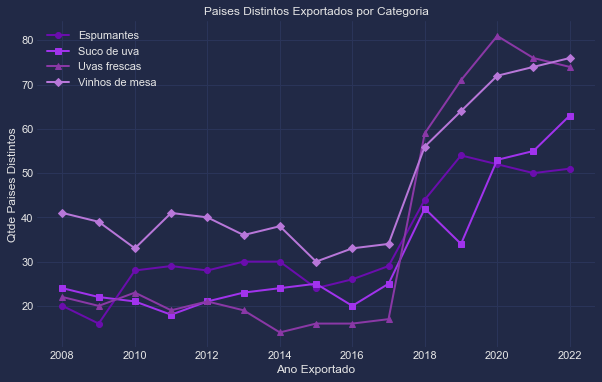

In [512]:
plt.style.use("cyberpunk")

# Reformatar os dados para que as categorias se tornem colunas
df_pivot = df_group.pivot(index='ano_exportado', columns='categorias', values='paises')

# Cores de roxo diferentes
cores = ['#6A0DAD', '#A133ED', '#8A38A6', '#B877D9']

# Estilos de marcadores diferentes
marcadores = ['o', 's', '^', 'D']

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
for i, categoria in enumerate(df_pivot.columns):
    plt.plot(df_pivot.index, df_pivot[categoria], label=categoria, color=cores[i], marker=marcadores[i], linewidth=2) 

# Configurar o título e os rótulos dos eixos
plt.title('Paises Distintos Exportados por Categoria')
plt.xlabel('Ano Exportado')
plt.ylabel('Qtde Paises Distintos')
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/exportacao_paises_categ.png', dpi = 300)

# Mostrar o gráfico
plt.show()

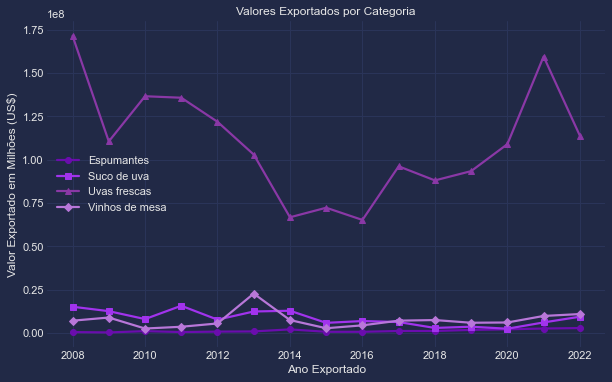

In [513]:
plt.style.use("cyberpunk")

# Reformatar os dados para que as categorias se tornem colunas
df_pivot = df_group.pivot(index='ano_exportado', columns='categorias', values='valor')

# Cores de roxo diferentes
cores = ['#6A0DAD', '#A133ED', '#8A38A6', '#B877D9']

# Estilos de marcadores diferentes
marcadores = ['o', 's', '^', 'D']

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
for i, categoria in enumerate(df_pivot.columns):
    plt.plot(df_pivot.index, df_pivot[categoria], label=categoria, color=cores[i], marker=marcadores[i], linewidth=2.2) 

# Configurar o título e os rótulos dos eixos
plt.title('Valores Exportados por Categoria')
plt.xlabel('Ano Exportado')
plt.ylabel('Valor Exportado em Milhões (US$)')
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/exportacao_valores_categ.png', dpi = 300)

# Mostrar o gráfico
plt.show()

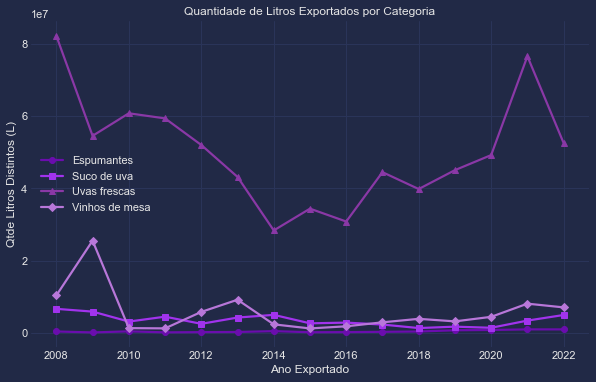

In [514]:
plt.style.use("cyberpunk")

# Reformatar os dados para que as categorias se tornem colunas
df_pivot = df_group.pivot(index='ano_exportado', columns='categorias', values='quantidade_litro')

# Cores de roxo diferentes
cores = ['#6A0DAD', '#A133ED', '#8A38A6', '#B877D9']

# Estilos de marcadores diferentes
marcadores = ['o', 's', '^', 'D']

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
for i, categoria in enumerate(df_pivot.columns):
    plt.plot(df_pivot.index, df_pivot[categoria], label=categoria, color=cores[i], marker=marcadores[i], linewidth=2.2) 

# Configurar o título e os rótulos dos eixos
plt.title('Quantidade de Litros Exportados por Categoria')
plt.xlabel('Ano Exportado')
plt.ylabel('Qtde Litros Distintos (L)')
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/exportacao_litros_categ.png', dpi = 300)

# Mostrar o gráfico
plt.show()

In [515]:
# Importando biblioteca BACEN (banco central)
from bcb import currency
from bcb import sgs

# Extraindo os dados da SELIC e IPCA dos ultimos 15 anos
selic = sgs.get({'selic': 432}, start = '2008-01-01').reset_index()
ipca = sgs.get({'ipca': 433}, start = '2008-01-01').reset_index()

# Visualizando ambas tabelas
selic.head(), ipca.head()

(        Date  selic
 0 2008-01-01  11.25
 1 2008-01-02  11.25
 2 2008-01-03  11.25
 3 2008-01-04  11.25
 4 2008-01-05  11.25,
         Date  ipca
 0 2008-01-01  0.54
 1 2008-02-01  0.49
 2 2008-03-01  0.48
 3 2008-04-01  0.55
 4 2008-05-01  0.79)

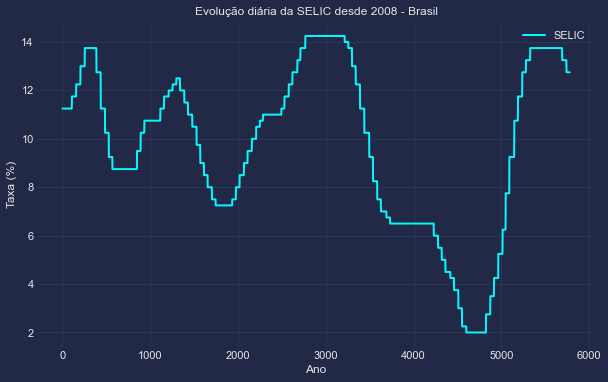

In [516]:
# Criando grafico de SELIC ao longo do tempo
plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))

# Plote as séries IPCA e SELIC
plt.plot(selic.index, selic['selic'], label='SELIC', linewidth=2)

# Configurar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Taxa (%)')
plt.title('Evolução diária da SELIC desde 2008 - Brasil')

# Adicione uma legenda
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/selic_diaria.png', dpi = 300)

# Mostrar o gráfico
plt.show()

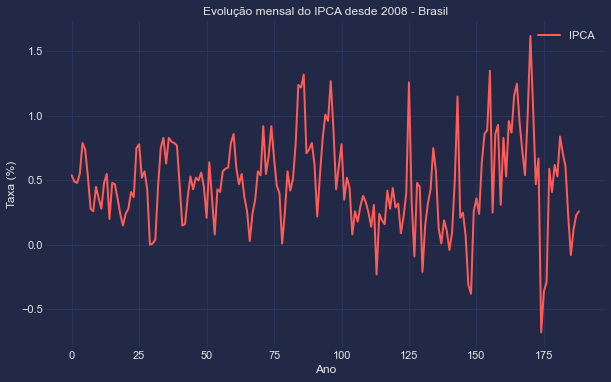

In [517]:
# Criando grafico de SELIC ao longo do tempo
plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))

# Plote as séries IPCA e SELIC
plt.plot(ipca.index, ipca['ipca'], label='IPCA', linewidth=2, color='#FF5C57')

# Configurar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Taxa (%)')
plt.title('Evolução mensal do IPCA desde 2008 - Brasil')

# Adicione uma legenda
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/ipca_mensal.png', dpi = 300)

# Mostrar o gráfico
plt.show()

In [518]:
# Criando IPCA ANUAL
ipca['ano'] = ipca['Date'].dt.year
ipca = ipca[['ano','ipca']].groupby(by=['ano']).sum()

# Criando SELIC ANUAL
selic['ano'] = selic['Date'].dt.year
selic = selic[['ano','selic']].groupby(by=['ano']).max()

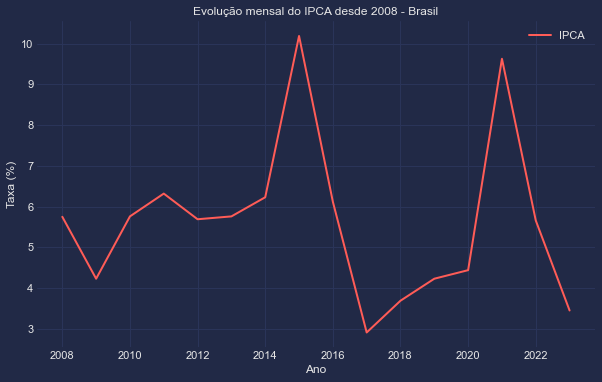

In [519]:
# Criando grafico de SELIC ao longo do tempo
plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))

# Plote as séries IPCA e SELIC
plt.plot(ipca.index, ipca['ipca'], label='IPCA', linewidth=2, color='#FF5C57')

# Configurar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Taxa (%)')
plt.title('Evolução mensal do IPCA desde 2008 - Brasil')

# Adicione uma legenda
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/ipca_anual.png', dpi = 300)

# Mostrar o gráfico
plt.show()

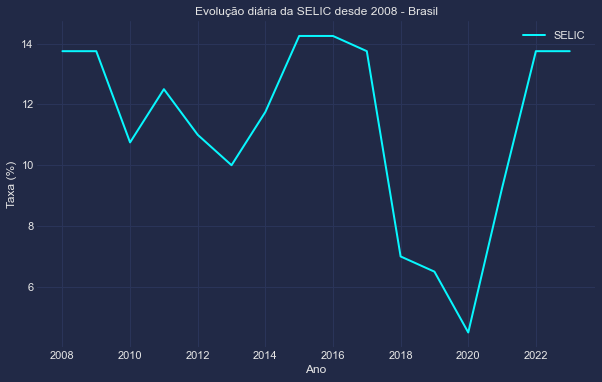

In [520]:
# Criando grafico de SELIC ao longo do tempo
plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))

# Plote as séries IPCA e SELIC
plt.plot(selic.index, selic['selic'], label='SELIC', linewidth=2)

# Configurar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Taxa (%)')
plt.title('Evolução diária da SELIC desde 2008 - Brasil')

# Adicione uma legenda
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/selic_anual.png', dpi = 300)

# Mostrar o gráfico
plt.show()

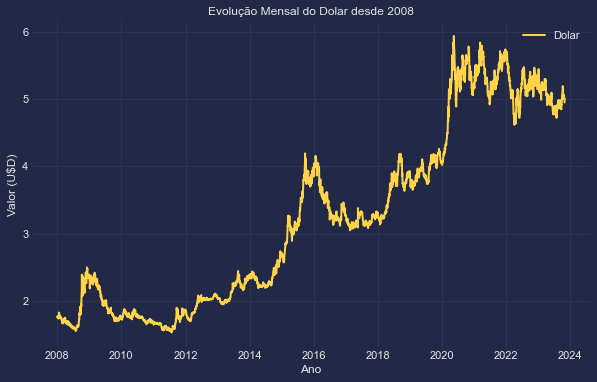

In [521]:
# Importas dolar desde 2008 para podermos comparar 
dolar = currency.get('USD', start='2008-01-01', end=dt.datetime.now())

# Criando grafico de SELIC ao longo do tempo
plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))

# Plote as séries IPCA e SELIC
plt.plot(dolar.index, dolar['USD'], label='Dolar', linewidth=2, color='#FFD449')

# Configurar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Valor (U$D)')
plt.title('Evolução Mensal do Dolar desde 2008')

# Adicione uma legenda
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/dolar.png', dpi = 300)

# Mostrar o gráfico
plt.show()

In [522]:
# Top 10 paises mais exportados
df_group_paises_15 = df[df.ano_exportado >= 2008][['pais_destino','quantidade_litro','valor']].\
    groupby(by=['pais_destino']).sum().reset_index()\
    .sort_values(by=['valor'], ascending=False)\
    .head(10)

df_group_paises_5 = df[df.ano_exportado >= 2017][['pais_destino','quantidade_litro','valor']].\
    groupby(by=['pais_destino']).sum().reset_index()\
    .sort_values(by=['valor'], ascending=False)\
    .head(10)

df_group_paises_1 = df[df.ano_exportado >= 2022][['pais_destino','quantidade_litro','valor']].\
    groupby(by=['pais_destino']).sum().reset_index()\
    .sort_values(by=['valor'], ascending=False)\
    .head(10)

In [523]:
# Verificando quanto o top 3 paises representam do faturamento total
df_group_paises_15.head(3).valor.sum()/df_group_paises_15.valor.sum()

0.8135340623853596

In [524]:
# Verificando quanto o top 3 paises representam do faturamento total
df_group_paises_5.head(3).valor.sum()/df_group_paises_5.valor.sum()

0.7636369251574087

In [525]:
# Verificando quanto o top 3 paises representam do faturamento total
df_group_paises_1.head(3).valor.sum()/df_group_paises_1.valor.sum()

0.7364580985565081

In [526]:
def top_10_paises(df_temp, titulo, arquivo):

    # Crie um gráfico de barras
    plt.figure(figsize=(10, 6))
    barras = plt.barh(df_temp['pais_destino'], df_temp['valor'], color='#A13359')

    # Remover as bordas das barras
    for barra in barras:
        barra.set_edgecolor('none')

    # Configure rótulos e título
    plt.xlabel('Valores (USD)')
    plt.ylabel('Países')
    plt.title(titulo)

    # Inverter a ordem dos países (maior no topo)
    plt.gca().invert_yaxis()

    # Exporta a imagem para ser usada no relatorio
    plt.savefig(f'imagens/{arquivo}.png', dpi = 300)

    # Mostrar o gráfico
    return plt.show()

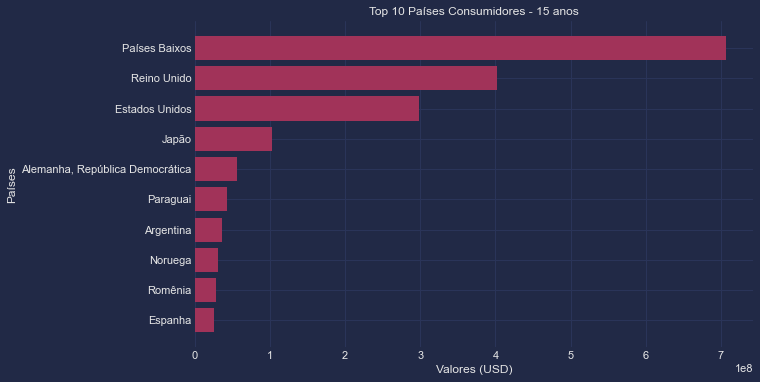

In [527]:
top_10_paises(df_group_paises_15, 'Top 10 Países Consumidores - 15 anos', 'top_10_paises_15a')

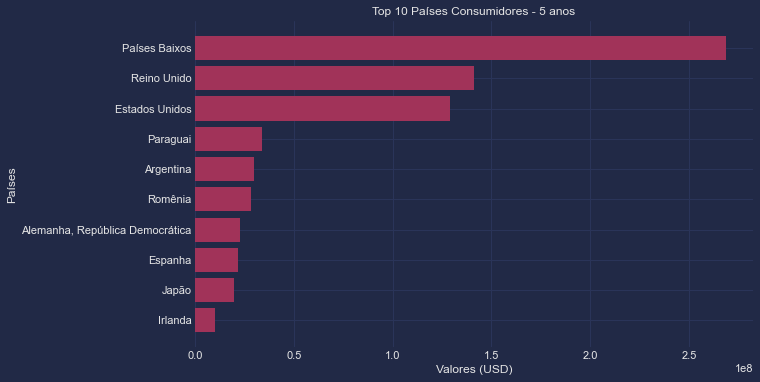

In [528]:
top_10_paises(df_group_paises_5, 'Top 10 Países Consumidores - 5 anos', 'top_10_paises_5a')

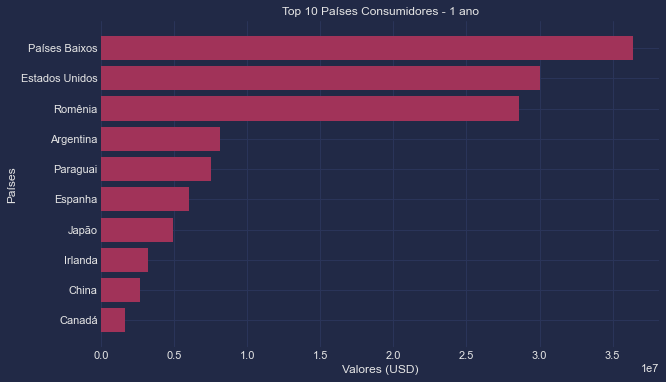

In [529]:
top_10_paises(df_group_paises_1, 'Top 10 Países Consumidores - 1 ano', 'top_10_paises_1a')

In [530]:
# Verificando o sumisso do reino unido 
df[
    (df.ano_exportado >= 2022) & 
    (df.pais_destino == 'Reino Unido')
]

,pais_origem,pais_destino,quantidade_litro,valor,categorias,ano_exportado,paises
2032,Brasil,Reino Unido,18835.0,138154.0,Vinhos de mesa,2022,1
2090,Brasil,Reino Unido,9305.0,53968.0,Espumantes,2022,1
2228,Brasil,Reino Unido,6412.0,13508.0,Suco de uva,2022,1


In [531]:
df_producao = pd.read_csv(r'bases/df_producao_15_anos.csv', sep=';')

# Filtrando apenas os titulos (que sao os totais)
df_producao = df_producao[df_producao['produto'].str.isupper()]

# Retirando os pontos do campo e convertendo para float para sumarizar
df_producao.quantidade_litro = df_producao.quantidade_litro.str.replace('.','').astype(float)

# Sumariza a base
df_producao_group = df_producao[['ano','quantidade_litro']].groupby(by=['ano']).sum().reset_index()

# cria coluna que ira usar no grafico
df_producao_group['categoria'] = 'producao'

In [532]:
# Separa o total de exportado para comparar com o produzido
df_exportacao = df_group[['ano_exportado','quantidade_litro']].groupby(by=['ano_exportado']).sum().reset_index()

# cria coluna que ira usar no grafico
df_exportacao['categoria'] = 'exportado'

df_exportacao.rename(columns={'ano_exportado':'ano'}, inplace=True)

In [533]:
df_comercializacao = pd.read_csv(r'bases/df_comercializacao_15_anos.csv', sep=';')

# Filtrando apenas os titulos (que sao os totais)
df_comercializacao = df_comercializacao[
        (df_comercializacao['produto'].str.isupper()) &
        ~(df_comercializacao['quantidade_litro'] == '-')
    ]

# Retirando os pontos do campo e convertendo para float para sumarizar
df_comercializacao.quantidade_litro = df_comercializacao.quantidade_litro.str.replace('.','').astype(float)

# Sumariza a base
df_comercializacao_group = df_comercializacao[['ano','quantidade_litro']].groupby(by=['ano']).sum().reset_index()

# cria coluna que ira usar no grafico
df_comercializacao_group['categoria'] = 'comercializacao'

In [534]:
df_group_mov_finan = pd.concat([df_producao_group, df_exportacao, df_comercializacao_group])

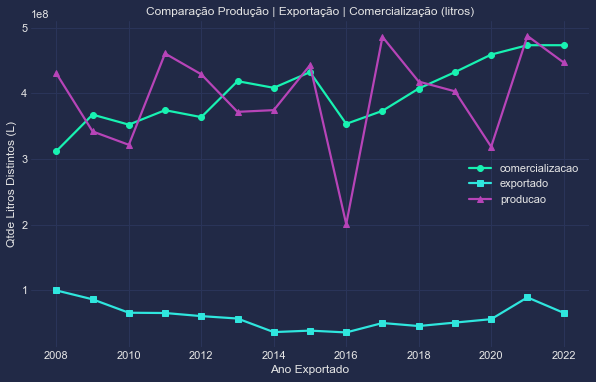

In [535]:
plt.style.use("cyberpunk")

# Reformatar os dados para que as categorias se tornem colunas
df_pivot = df_group_mov_finan.pivot(index='ano', columns='categoria', values='quantidade_litro')

# Cores de roxo diferentes
cores = ['#18F2B2', '#2FE6DE', '#B744B8']

# Estilos de marcadores diferentes
marcadores = ['o', 's', '^']

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
for i, categoria in enumerate(df_pivot.columns):
    plt.plot(df_pivot.index, df_pivot[categoria], label=categoria, color=cores[i], marker=marcadores[i], linewidth=2.2) 

# Configurar o título e os rótulos dos eixos
plt.title('Comparação Produção | Exportação | Comercialização (litros)')
plt.xlabel('Ano Exportado')
plt.ylabel('Qtde Litros Distintos (L)')
plt.legend()

# Exporta a imagem para ser usada no relatorio
plt.savefig('imagens/comparacao_expo_prod_comer.png', dpi = 300)

# Mostrar o gráfico
plt.show()